In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore

In [2]:
df=pd.read_csv(r"C:\Users\BAPS\Desktop\Python\Datasets\airbnb_nyc_clean.csv")
df_o=df

In [3]:
df.head()

id                                              name      host_id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                             blank  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host_name neighbourhood_group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2            unconfirmed     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long  instant_bookable  ...  price service_fee  \
0  40.64749 -73.97237             False  ...  966.0       193.0   
1  40.75362 -73.98377             False  ...  142.0        28.0   
2  40.80902 -73.94190              True  ...  620.0       124.0   
3  40.68514 -73.95976              True  ...  368.0        74.0   
4  40.79851 -73.94399             False  ...  204.0        41.0   

   minimum_nights  number_of_reviews  last_review  reviews_per_month  \
0            10.0                9.0   2021-10-19               0.21   
1            13.0               45.0   2022-05-21               0.38   
2             3.0                0.0   2019-06-14               0.79   
3            13.0              270.0   2019-07-05               4.64   
4            10.0                9.0   2018-11-19               0.10   

   review_rate_number calculated_host_listings_count  availability_365  \
0                 4.0                            6.0             286.0   
1                 4.0                            2.0             228.0   
2                 5.0                            1.0             352.0   
3                 4.0                            1.0             322.0   
4                 3.0                            1.0             289.0   

                                         house_rules  
0  Clean up and treat the home the way you'd like...  
1  Pet friendly but please confirm with me if the...  
2  I encourage you to use my kitchen, cooking and...  
3                                              blank  
4  Please no smoking in the house, porch or on th...  

[5 rows x 23 columns]

In [4]:
df.columns

Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long',
       'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'house_rules'],
      dtype='object')

In [5]:
df.info()
# Observation : Columns 'name','host_identity_verified',"host_name","neighbourhood_group","neighbourhood","cancellation_policy","instant_bookable","room_type","last_review","house_rules" are object else are numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69305 entries, 0 to 69304
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              69305 non-null  int64  
 1   name                            69305 non-null  object 
 2   host_id                         69305 non-null  int64  
 3   host_identity_verified          69305 non-null  object 
 4   host_name                       69305 non-null  object 
 5   neighbourhood_group             69305 non-null  object 
 6   neighbourhood                   69305 non-null  object 
 7   lat                             69305 non-null  float64
 8   long                            69305 non-null  float64
 9   instant_bookable                69305 non-null  bool   
 10  cancellation_policy             69305 non-null  object 
 11  room_type                       69305 non-null  object 
 12  construction_year               

In [6]:
a=['name','host_identity_verified',"host_name","neighbourhood_group","neighbourhood","cancellation_policy","instant_bookable","room_type","last_review","house_rules"]
df=df.drop(a,axis=1)

In [7]:
df

id      host_id       lat      long  construction_year  \
0       1001254  80014485718  40.64749 -73.97237             2020.0   
1       1002102  52335172823  40.75362 -73.98377             2007.0   
2       1002403  78829239556  40.80902 -73.94190             2005.0   
3       1002755  85098326012  40.68514 -73.95976             2005.0   
4       1003689  92037596077  40.79851 -73.94399             2009.0   
...         ...          ...       ...       ...                ...   
69300  57361342  29964876857  40.69370 -73.91006             2016.0   
69301  57361894  92852058426  40.71284 -73.96284             2005.0   
69302  57362446  95572379802  40.79563 -73.97634             2010.0   
69303  57362999  80154173698  40.76125 -73.98945             2020.0   
69304  57363551  11145329848  40.68221 -73.94618             2016.0   

           price  service_fee  minimum_nights  number_of_reviews  \
0      966.00000   193.000000            10.0                9.0   
1      142.00000    28.000000            13.0               45.0   
2      620.00000   124.000000             3.0                0.0   
3      368.00000    74.000000            13.0              270.0   
4      204.00000    41.000000            10.0                9.0   
...          ...          ...             ...                ...   
69300  624.73607   124.894026             5.0                3.0   
69301  624.73607   124.894026             7.0               15.0   
69302  624.73607   124.894026             3.0               38.0   
69303  624.73607   124.894026             1.0               81.0   
69304  624.73607   124.894026             2.0              104.0   

       reviews_per_month  review_rate_number  calculated_host_listings_count  \
0                   0.21                 4.0                             6.0   
1                   0.38                 4.0                             2.0   
2                   0.79                 5.0                             1.0   
3                   4.64                 4.0                             1.0   
4                   0.10                 3.0                             1.0   
...                  ...                 ...                             ...   
69300               0.11                 1.0                             1.0   
69301               0.55                 4.0                             1.0   
69302               1.40                 3.0                             1.0   
69303               2.96                 2.0                             2.0   
69304               3.69                 5.0                             1.0   

       availability_365  
0                 286.0  
1                 228.0  
2                 352.0  
3                 322.0  
4                 289.0  
...                 ...  
69300               0.0  
69301               0.0  
69302              31.0  
69303               0.0  
69304             268.0  

[69305 rows x 13 columns]

In [8]:
mis=df.isnull().sum()
mis_per=mis/len(df)
to_mis=pd.DataFrame(data=[mis,mis_per],index=['Number','Percentage']).T
to_mis

Number  Percentage
id                                 0.0         0.0
host_id                            0.0         0.0
lat                                0.0         0.0
long                               0.0         0.0
construction_year                  0.0         0.0
price                              0.0         0.0
service_fee                        0.0         0.0
minimum_nights                     0.0         0.0
number_of_reviews                  0.0         0.0
reviews_per_month                  0.0         0.0
review_rate_number                 0.0         0.0
calculated_host_listings_count     0.0         0.0
availability_365                   0.0         0.0

In [9]:
df.describe().T

count          mean           std  \
id                              69305.0  2.015746e+07  1.109105e+07   
host_id                         69305.0  4.929192e+10  2.854010e+10   
lat                             69305.0  4.072807e+01  5.597270e-02   
long                            69305.0 -7.394904e+01  5.046980e-02   
construction_year               69305.0  2.012490e+03  5.756144e+00   
price                           69305.0  6.247361e+02  3.311589e+02   
service_fee                     69305.0  1.248940e+02  6.622279e+01   
minimum_nights                  69305.0  4.620330e+00  4.356887e+00   
number_of_reviews               69305.0  2.800390e+01  5.203518e+01   
reviews_per_month               69305.0  1.301503e+00  1.659188e+00   
review_rate_number              69305.0  3.321636e+00  1.255746e+00   
calculated_host_listings_count  69305.0  8.976755e+00  3.480845e+01   
availability_365                69305.0  1.531843e+02  1.344214e+02   

                                         min           25%           50%  \
id                              1.001254e+06  1.057049e+07  2.013964e+07   
host_id                         1.303496e+08  2.459948e+10  4.915407e+10   
lat                             4.049979e+01  4.068854e+01  4.072265e+01   
long                           -7.424984e+01 -7.398279e+01 -7.395439e+01   
construction_year               2.003000e+03  2.008000e+03  2.012000e+03   
price                           5.000000e+01  3.390000e+02  6.247361e+02   
service_fee                     1.000000e+01  6.800000e+01  1.248940e+02   
minimum_nights                  0.000000e+00  2.000000e+00  3.000000e+00   
number_of_reviews               0.000000e+00  1.000000e+00  7.000000e+00   
reviews_per_month               1.000000e-02  3.000000e-01  7.900000e-01   
review_rate_number              1.000000e+00  2.000000e+00  3.000000e+00   
calculated_host_listings_count  1.000000e+00  1.000000e+00  1.000000e+00   
availability_365               -1.000000e+01  1.800000e+01  1.270000e+02   

                                         75%           max  
id                              2.970878e+07  5.736355e+07  
host_id                         7.406137e+10  9.876313e+10  
lat                             4.076273e+01  4.091697e+01  
long                           -7.393138e+01 -7.370522e+01  
construction_year               2.017000e+03  2.022000e+03  
price                           9.110000e+02  1.200000e+03  
service_fee                     1.820000e+02  2.400000e+02  
minimum_nights                  6.000000e+00  1.300000e+01  
number_of_reviews               3.000000e+01  1.024000e+03  
reviews_per_month               1.730000e+00  9.000000e+01  
review_rate_number              4.000000e+00  5.000000e+00  
calculated_host_listings_count  3.000000e+00  3.320000e+02  
availability_365                2.810000e+02  4.260000e+02

# Univariante Analysis

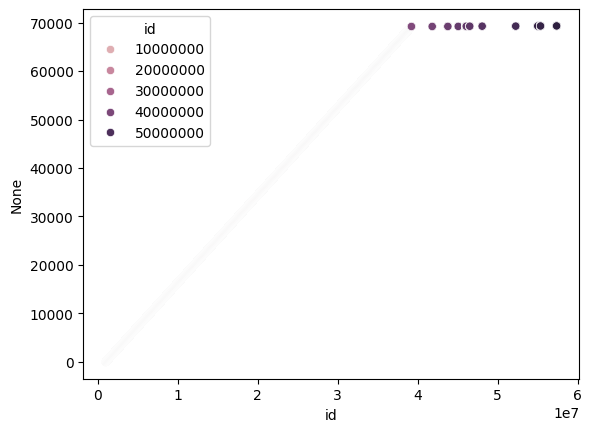

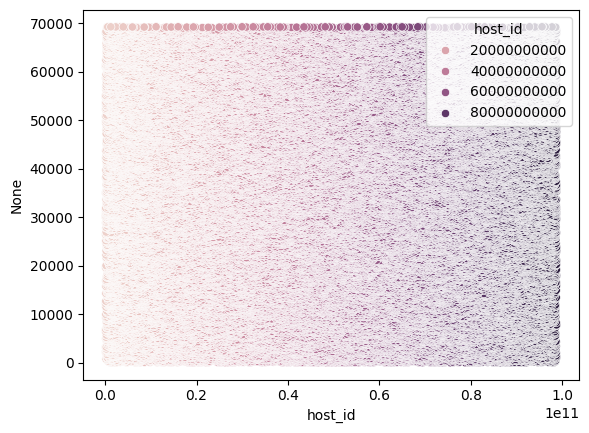

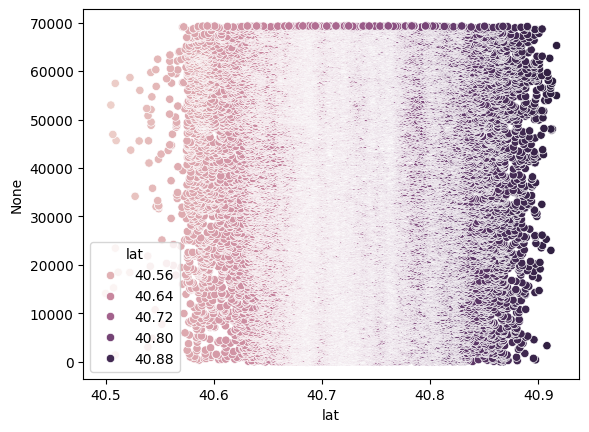

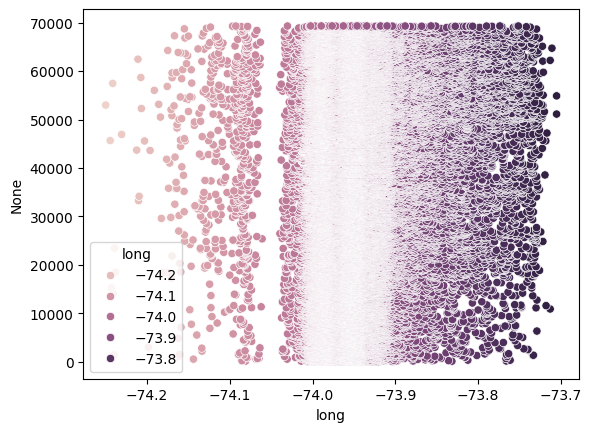

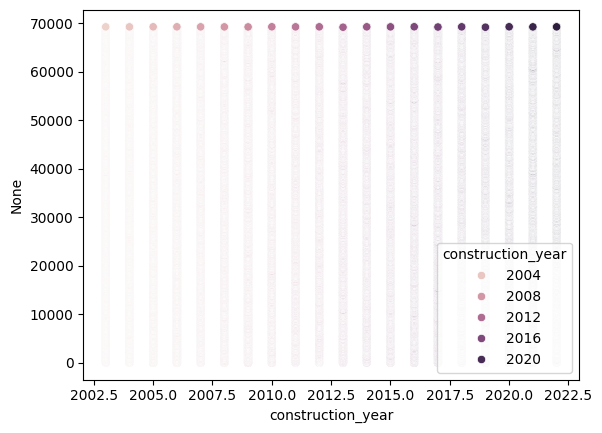

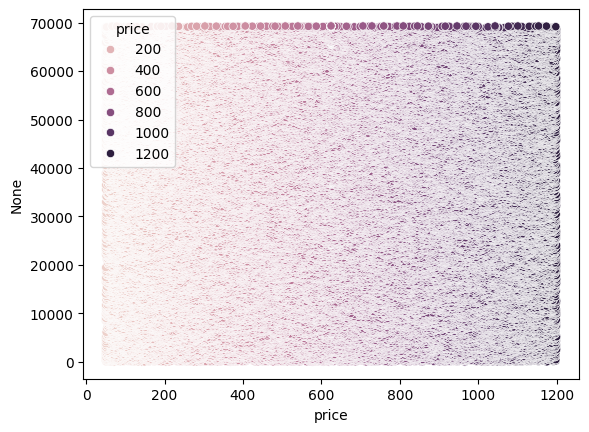

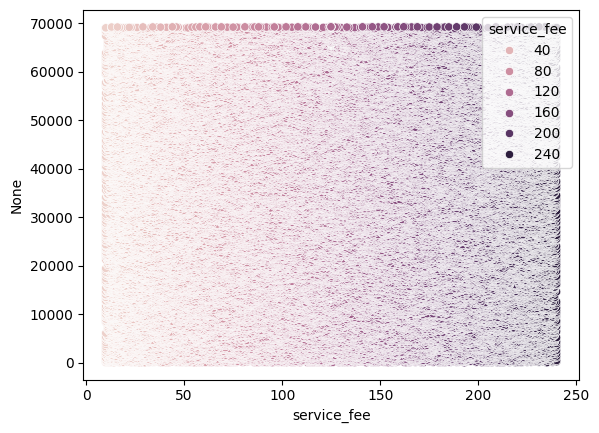

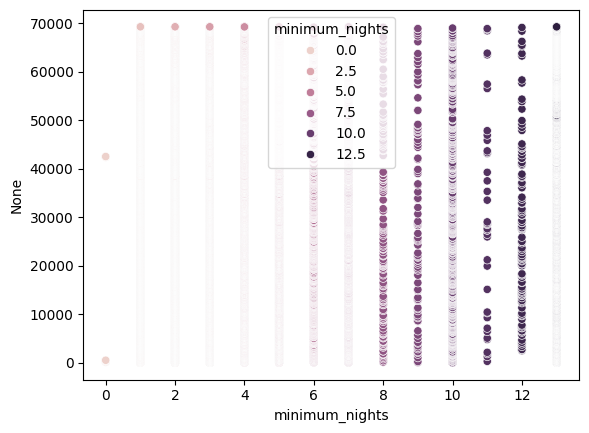

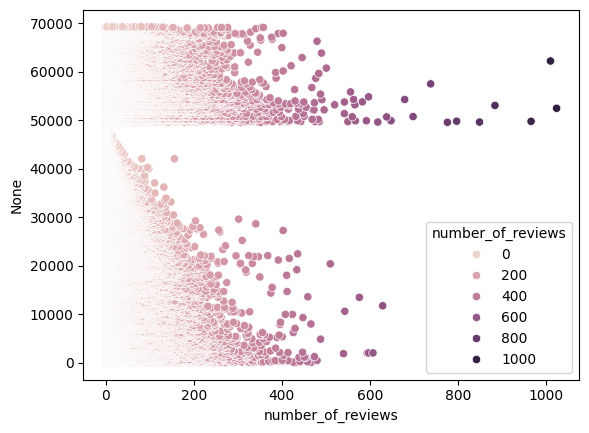

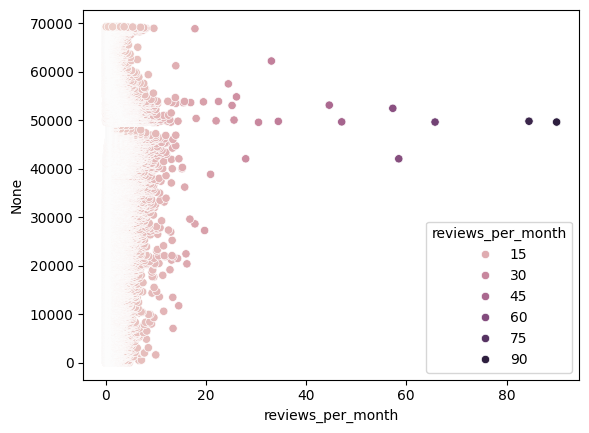

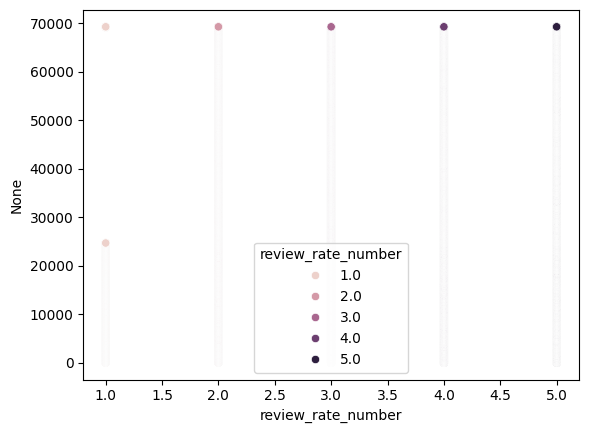

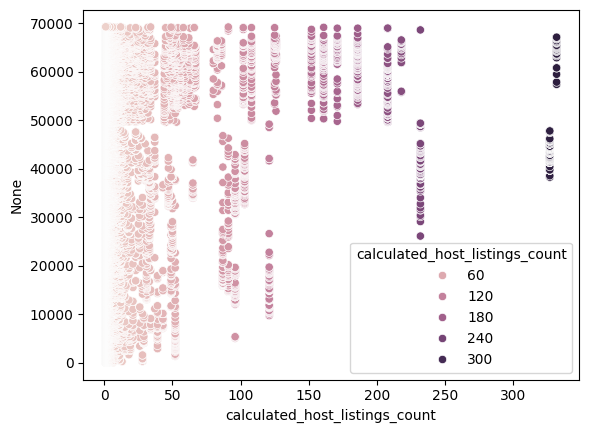

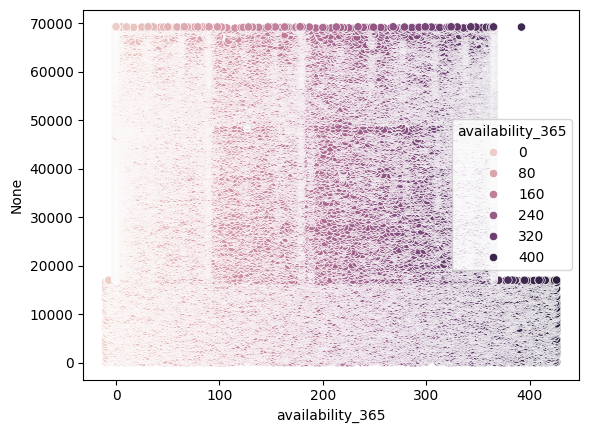

In [10]:
for col in df.columns :
    plt.figure()
    sns.scatterplot(data=df,x=df[col],y=df.index,hue=col)

C:\Users\BAPS\AppData\Local\Temp\ipykernel_12572\1423133827.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

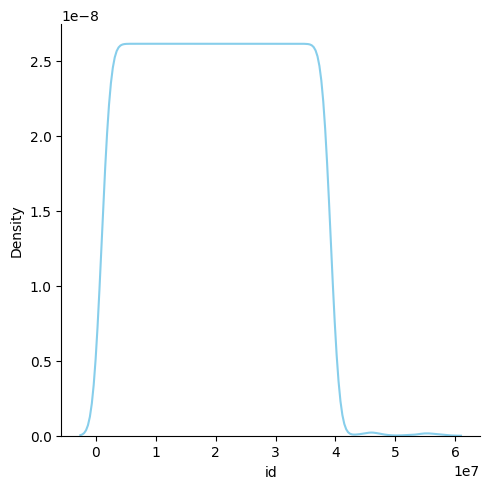

<Figure size 640x480 with 0 Axes>

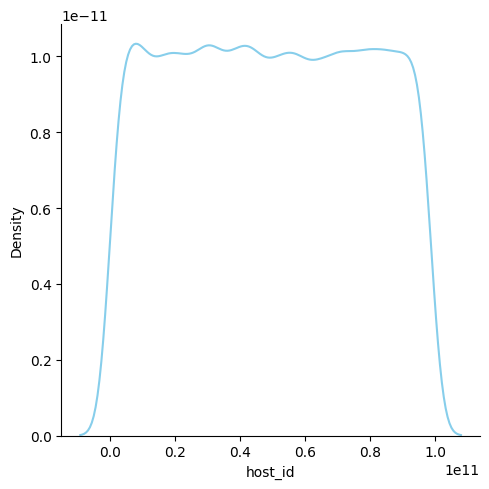

<Figure size 640x480 with 0 Axes>

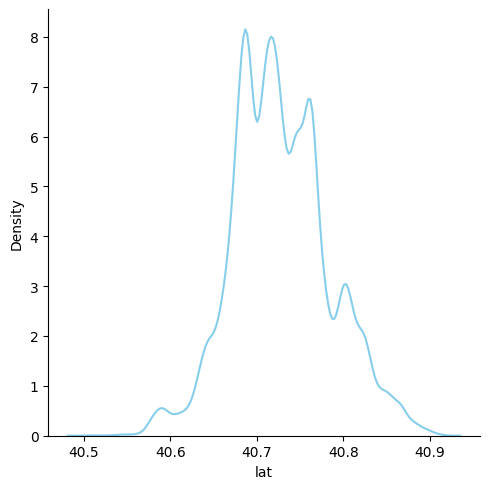

<Figure size 640x480 with 0 Axes>

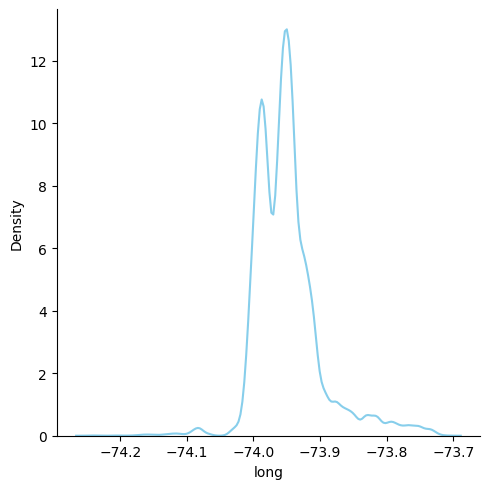

<Figure size 640x480 with 0 Axes>

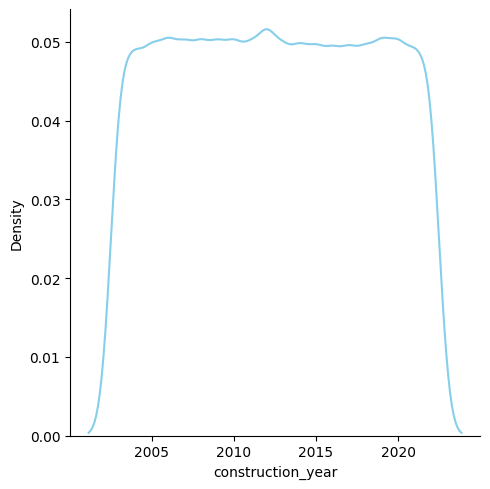

<Figure size 640x480 with 0 Axes>

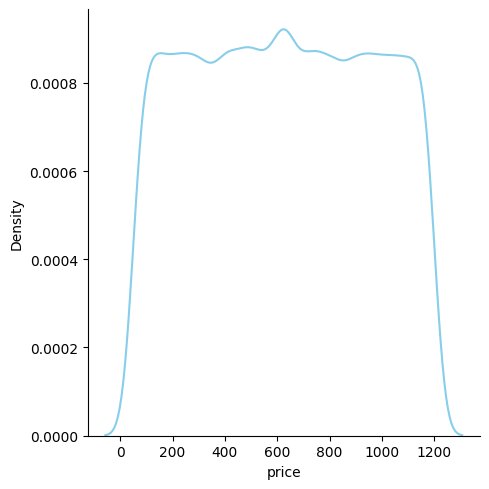

<Figure size 640x480 with 0 Axes>

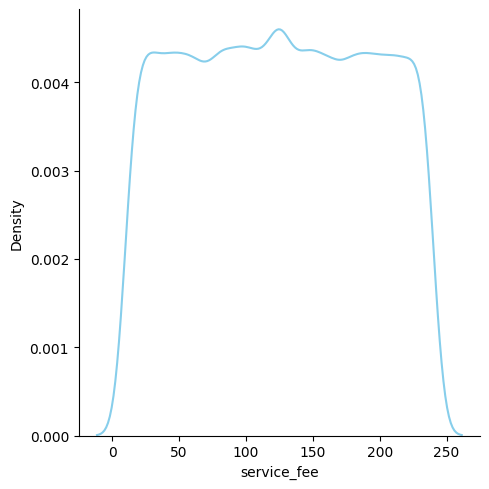

<Figure size 640x480 with 0 Axes>

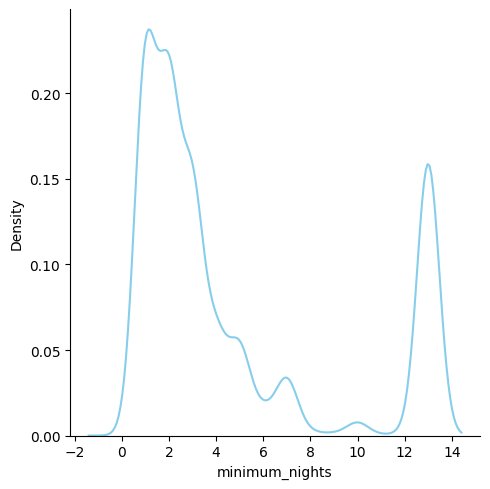

<Figure size 640x480 with 0 Axes>

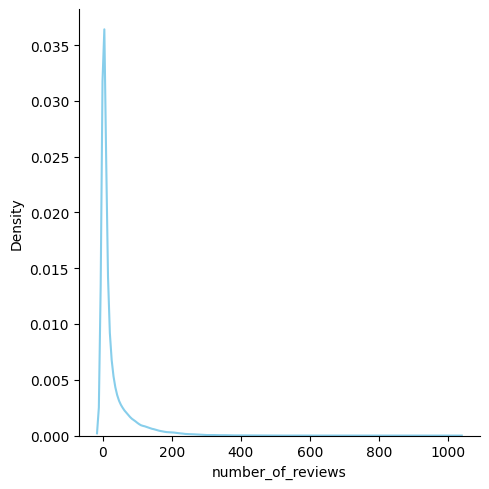

<Figure size 640x480 with 0 Axes>

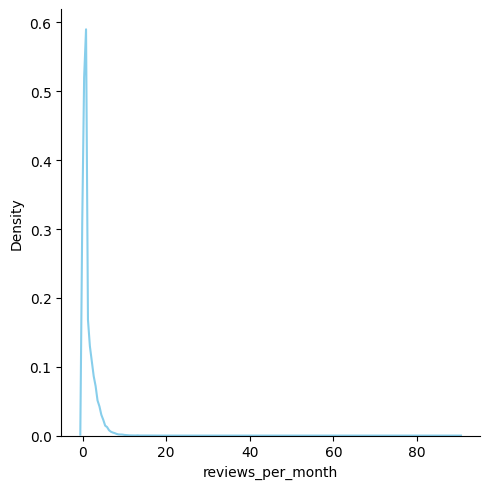

<Figure size 640x480 with 0 Axes>

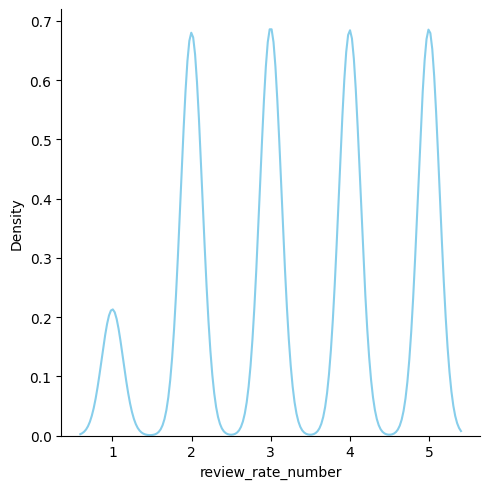

<Figure size 640x480 with 0 Axes>

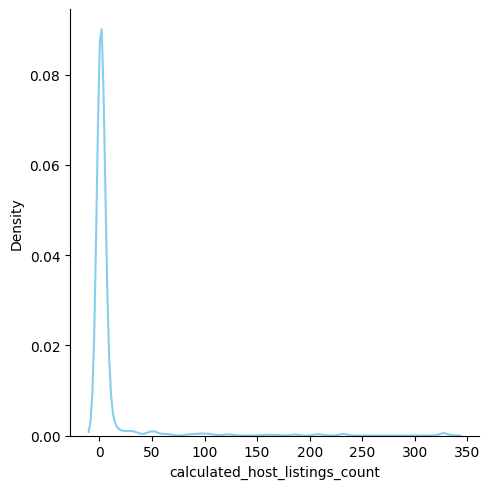

<Figure size 640x480 with 0 Axes>

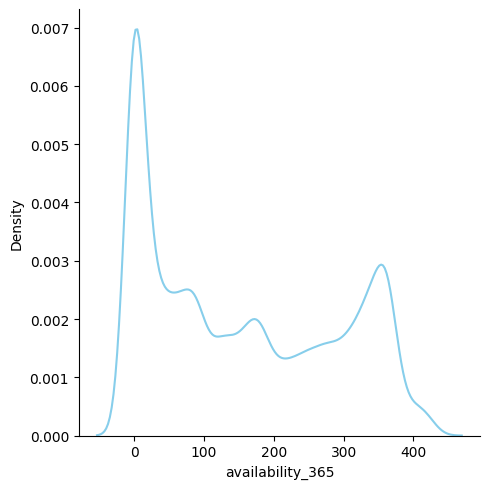

In [11]:
for col in df.columns:
    plt.figure()
    sns.displot(df[col],color='skyblue',kind='kde')

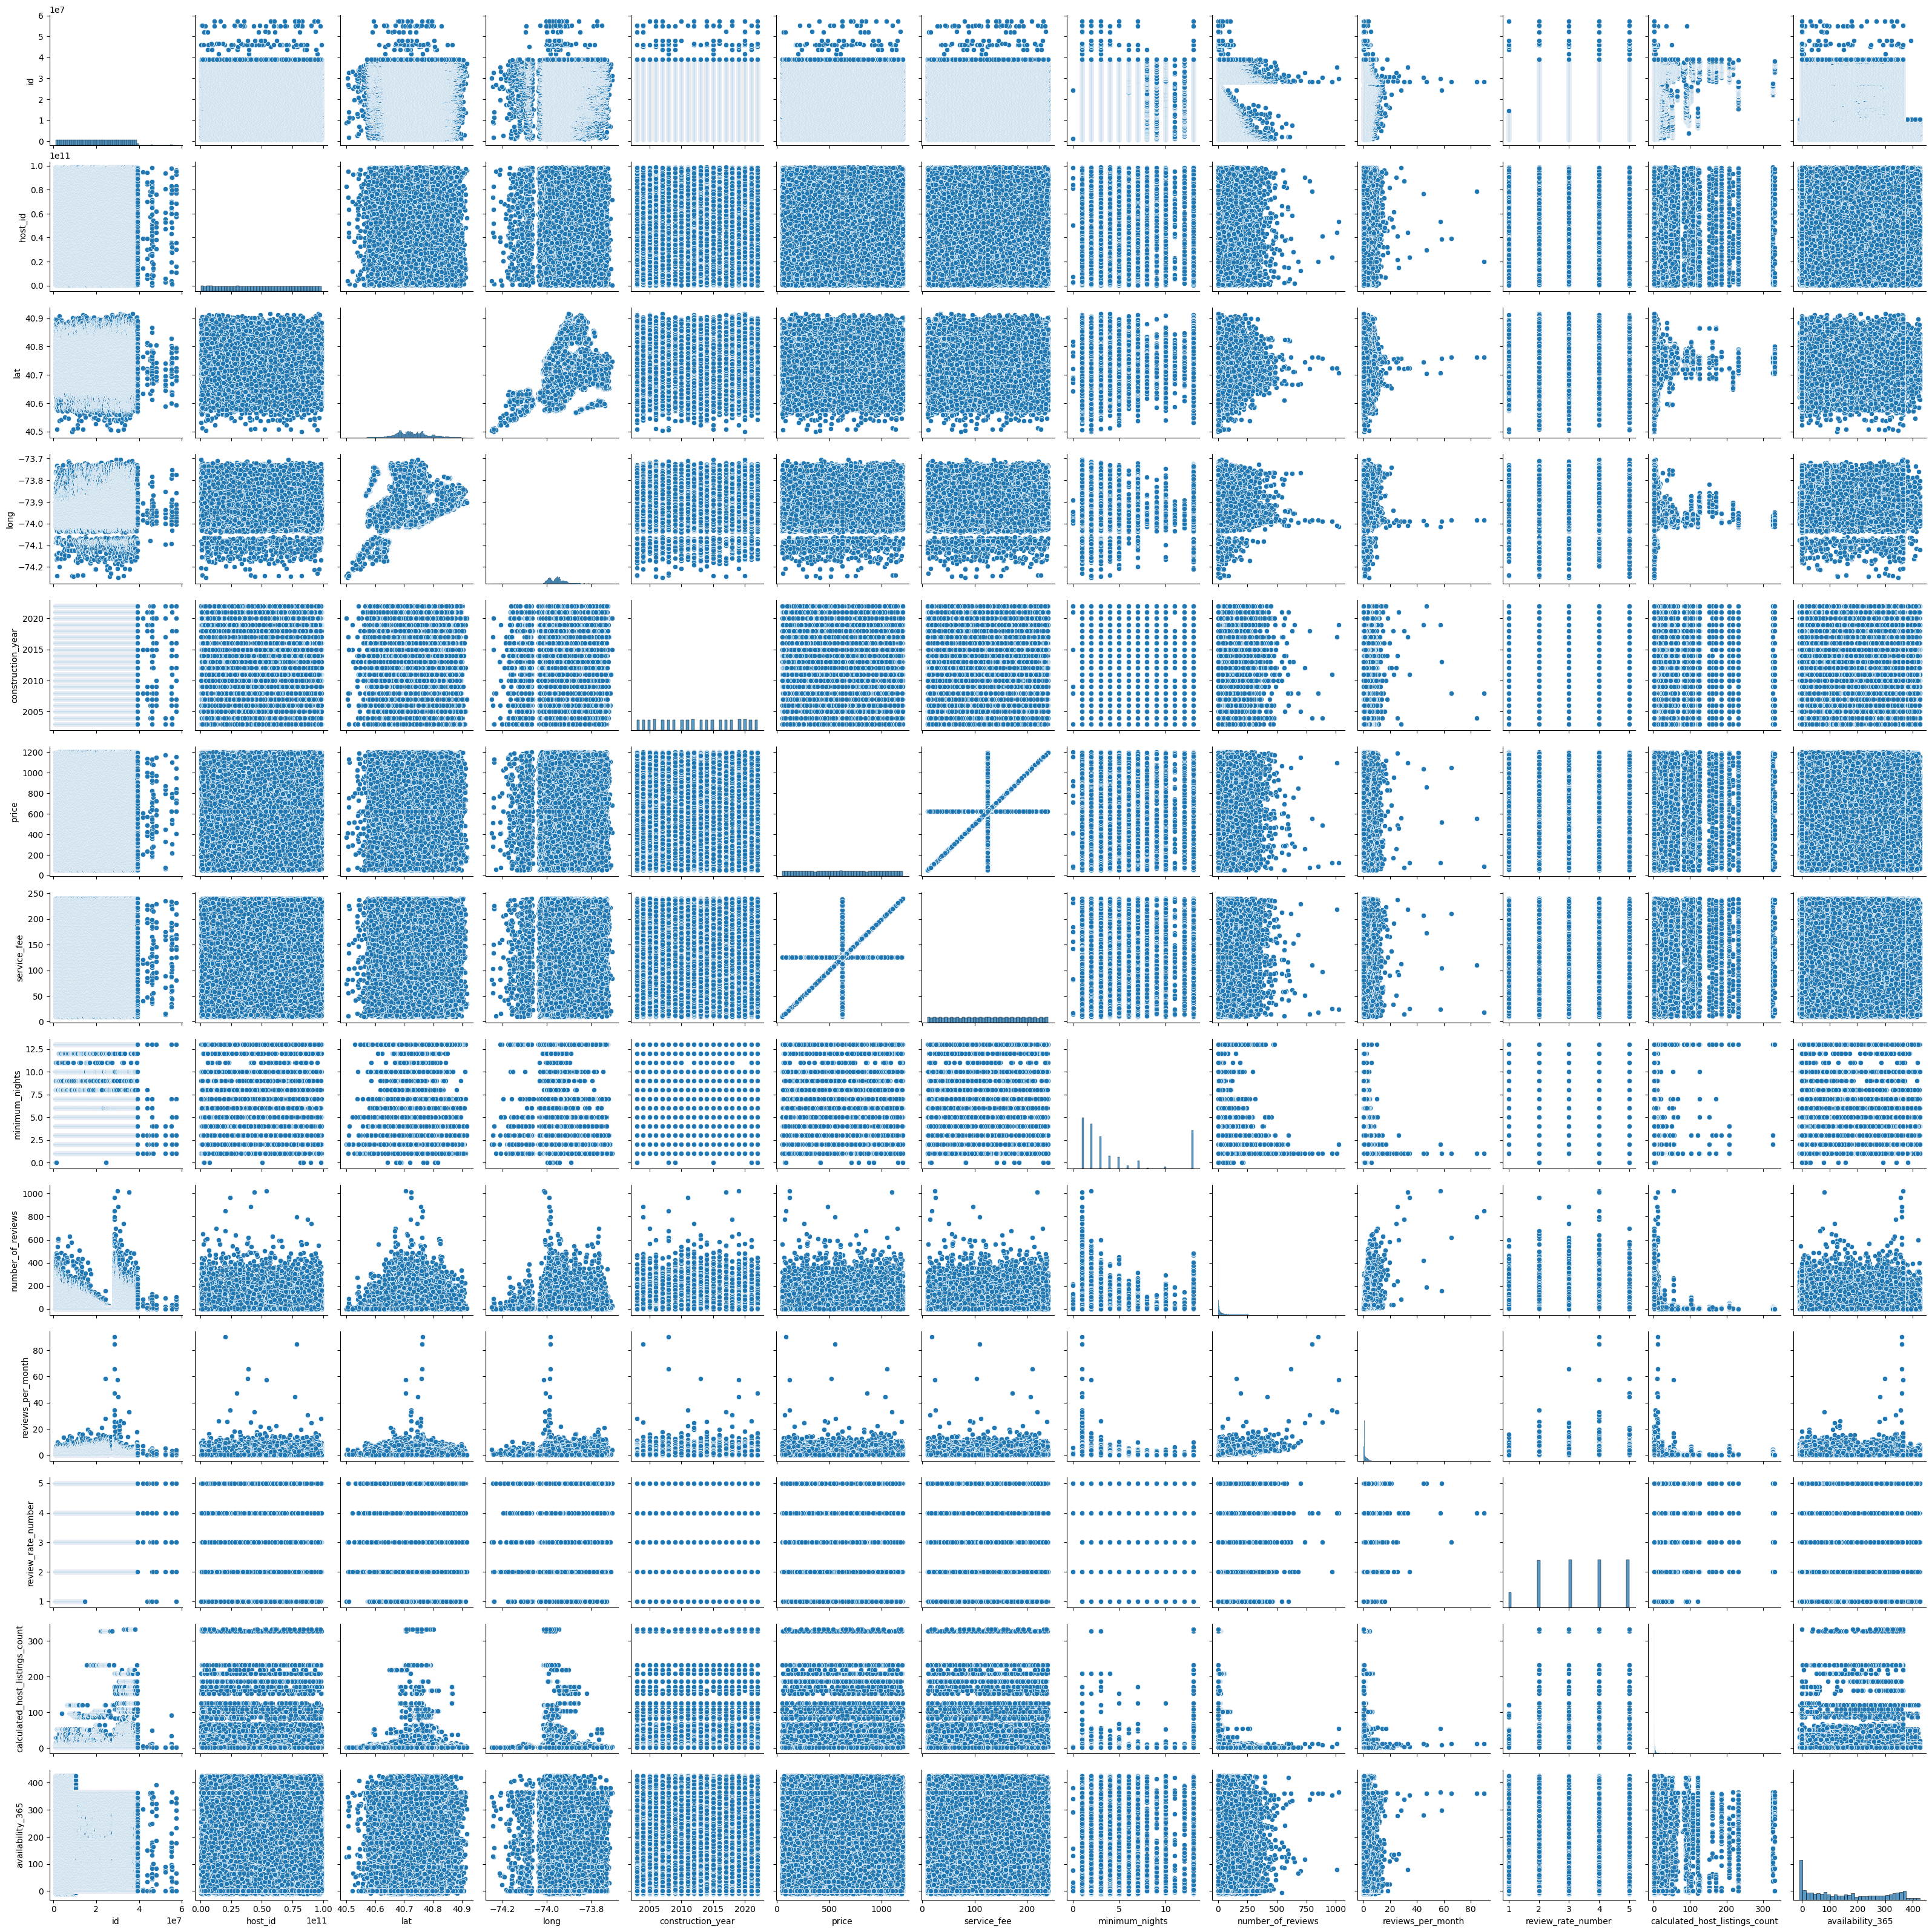

In [12]:
sns.pairplot(data=df)

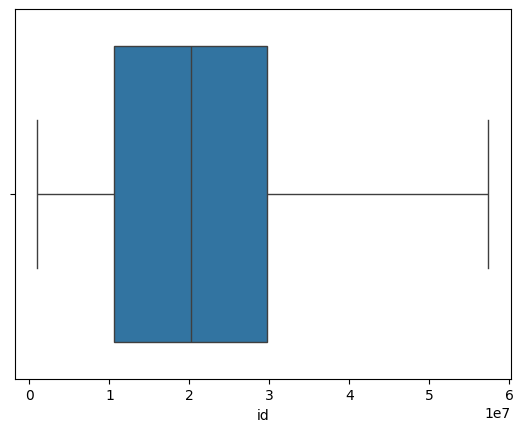

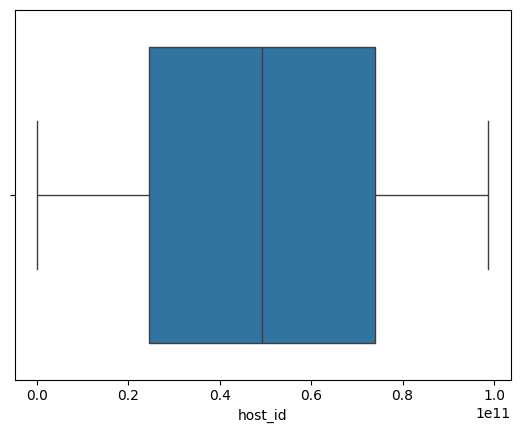

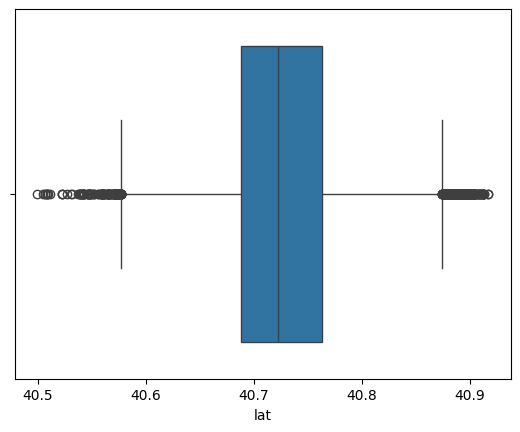

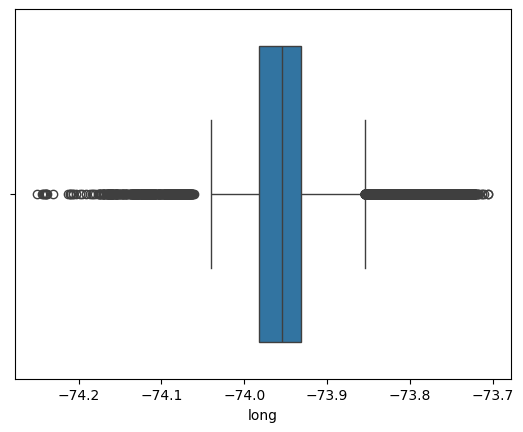

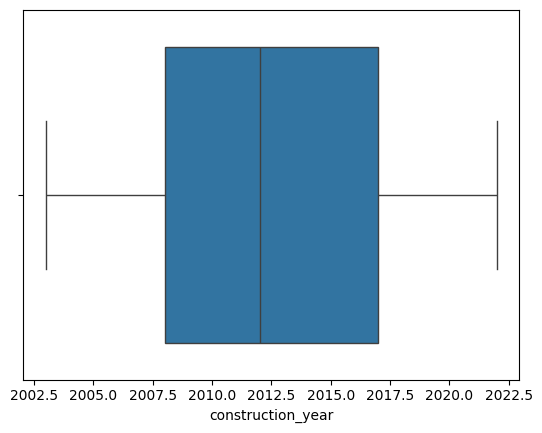

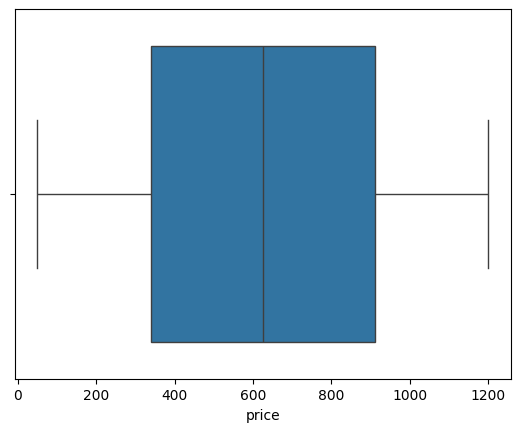

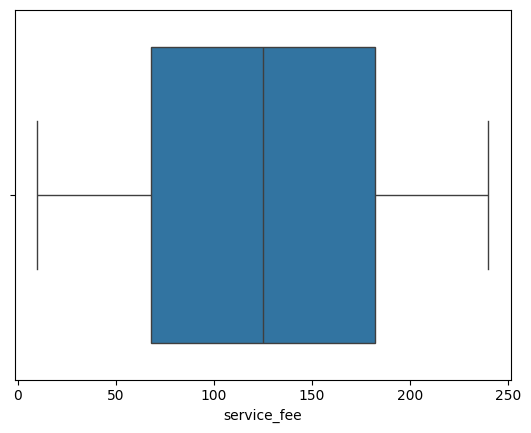

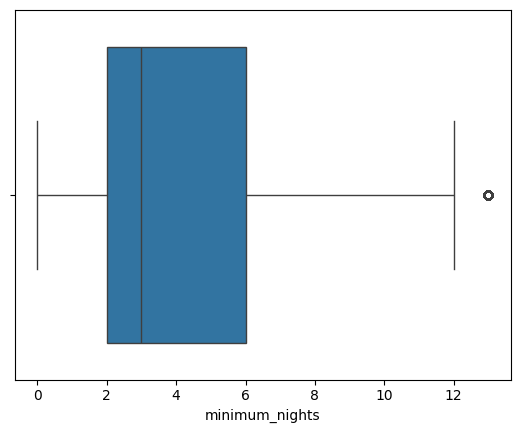

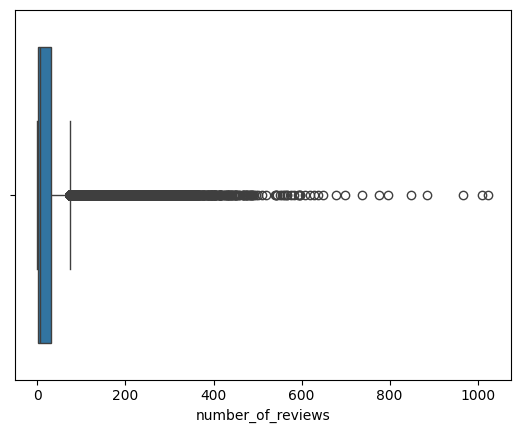

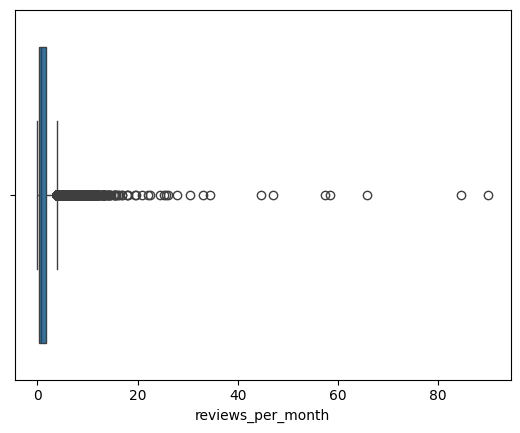

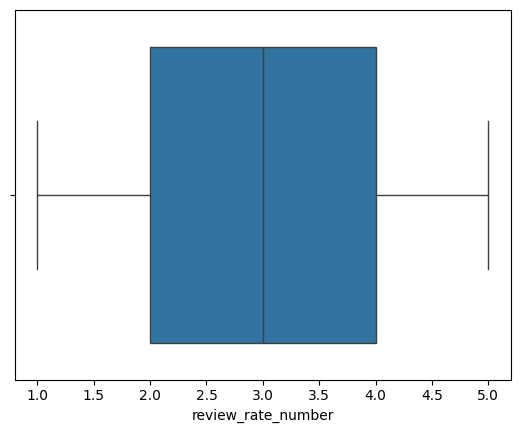

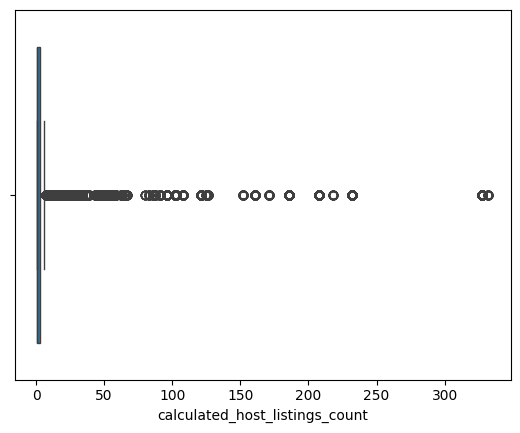

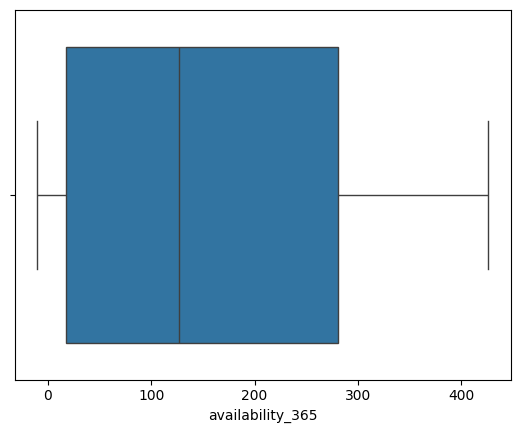

In [13]:
for column in df.columns :
    plt.figure()
    sns.boxplot(x = df[column], data = df)

In [14]:
corr=df.corr()
corr

id   host_id       lat      long  \
id                              1.000000 -0.000977 -0.017637  0.111255   
host_id                        -0.000977  1.000000 -0.000253 -0.003973   
lat                            -0.017637 -0.000253  1.000000  0.064872   
long                            0.111255 -0.003973  0.064872  1.000000   
construction_year               0.002726 -0.000193  0.001712  0.001094   
price                           0.008385  0.005970 -0.004253  0.005065   
service_fee                     0.008339  0.005822 -0.004194  0.004780   
minimum_nights                  0.175717 -0.000375  0.039359 -0.100202   
number_of_reviews              -0.041674 -0.003830 -0.026797  0.058211   
reviews_per_month               0.100222 -0.001008 -0.023990  0.108019   
review_rate_number              0.156591  0.003791 -0.003318  0.017998   
calculated_host_listings_count  0.132629  0.004441  0.036674 -0.105518   
availability_365               -0.062533  0.000496 -0.002391  0.050854   

                                construction_year     price  service_fee  \
id                                       0.002726  0.008385     0.008339   
host_id                                 -0.000193  0.005970     0.005822   
lat                                      0.001712 -0.004253    -0.004194   
long                                     0.001094  0.005065     0.004780   
construction_year                        1.000000 -0.001645    -0.001268   
price                                   -0.001645  1.000000     0.997073   
service_fee                             -0.001268  0.997073     1.000000   
minimum_nights                          -0.004027 -0.001955    -0.002067   
number_of_reviews                        0.004357  0.006575     0.006544   
reviews_per_month                        0.005646  0.005077     0.004995   
review_rate_number                       0.006313 -0.001506    -0.001289   
calculated_host_listings_count          -0.003831  0.000595     0.000827   
availability_365                        -0.004002 -0.001785    -0.002192   

                                minimum_nights  number_of_reviews  \
id                                    0.175717          -0.041674   
host_id                              -0.000375          -0.003830   
lat                                   0.039359          -0.026797   
long                                 -0.100202           0.058211   
construction_year                    -0.004027           0.004357   
price                                -0.001955           0.006575   
service_fee                          -0.002067           0.006544   
minimum_nights                        1.000000          -0.127562   
number_of_reviews                    -0.127562           1.000000   
reviews_per_month                    -0.272522           0.551162   
review_rate_number                    0.016415          -0.013252   
calculated_host_listings_count        0.228370          -0.084275   
availability_365                      0.074307           0.074274   

                                reviews_per_month  review_rate_number  \
id                                       0.100222            0.156591   
host_id                                 -0.001008            0.003791   
lat                                     -0.023990           -0.003318   
long                                     0.108019            0.017998   
construction_year                        0.005646            0.006313   
price                                    0.005077           -0.001506   
service_fee                              0.004995           -0.001289   
minimum_nights                          -0.272522            0.016415   
number_of_reviews                        0.551162           -0.013252   
reviews_per_month                        1.000000            0.034664   
review_rate_number                       0.034664            1.000000   
calculated_host_listings_count          -0.035635            0.023114   
availability_365    

In [15]:
df.shape

(69305, 13)

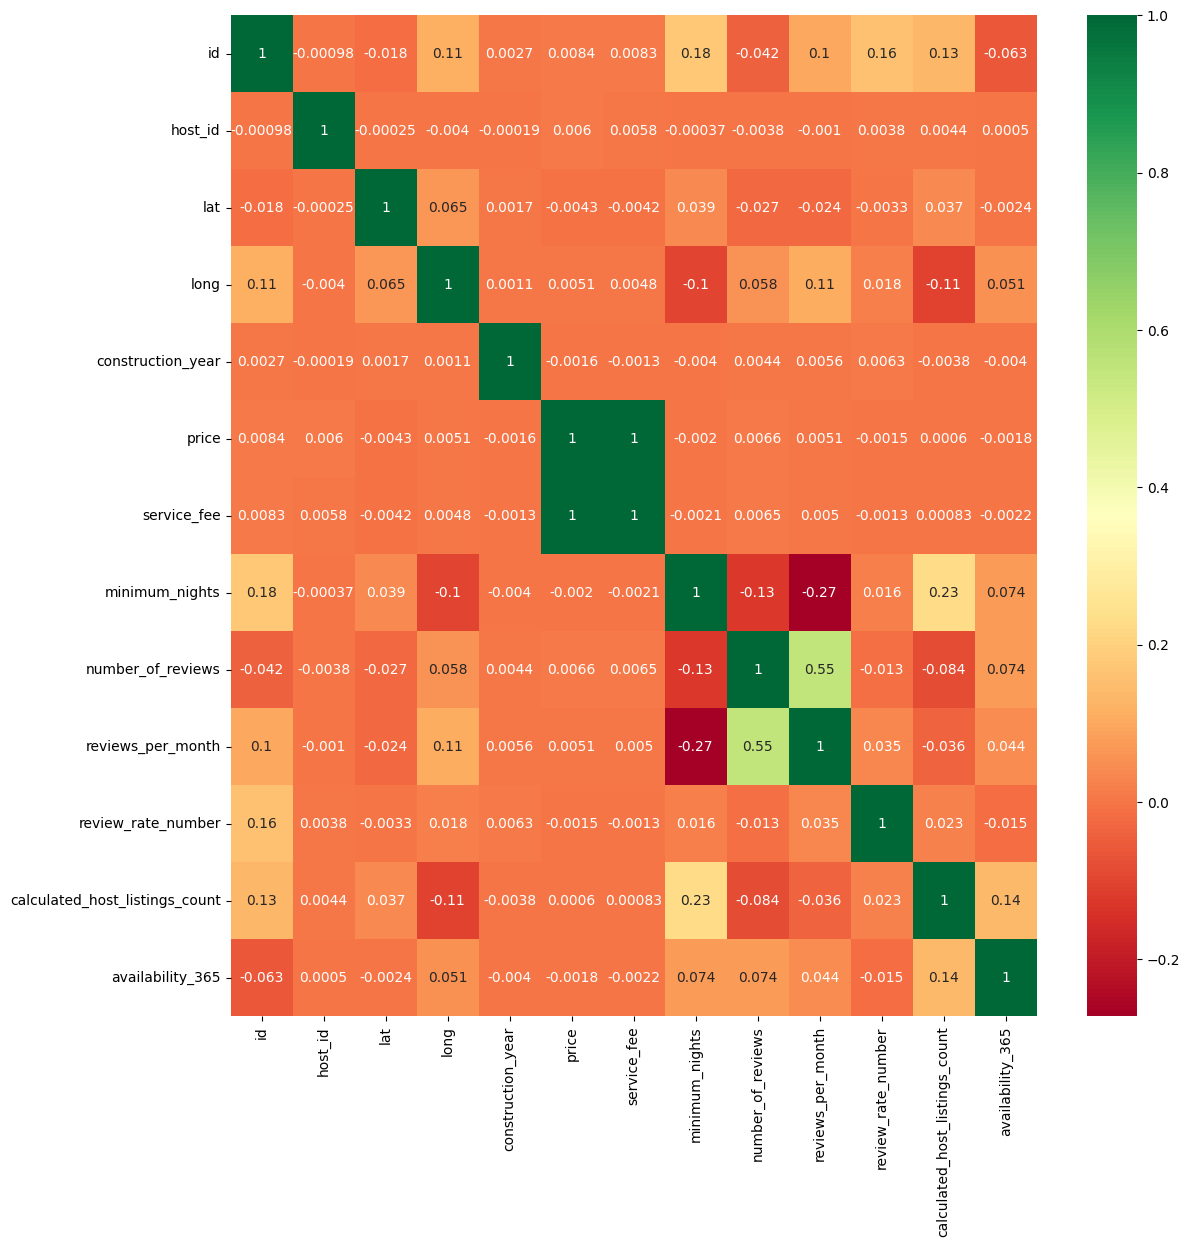

In [16]:
plt.subplots(figsize=(13,13))
sns.heatmap(corr,cmap='RdYlGn',annot=True)
plt.show()

In [17]:
skew = df.skew()
print("\nSkew\n")
print(skew)


Skew

id                                0.021827
host_id                           0.004266
lat                               0.214486
long                              1.246571
construction_year                 0.004561
price                             0.001848
service_fee                       0.002785
minimum_nights                    1.163166
number_of_reviews                 3.924162
reviews_per_month                 8.976864
review_rate_number               -0.137604
calculated_host_listings_count    6.538789
availability_365                  0.359776
dtype: float64


(<seaborn.axisgrid.FacetGrid at 0x2957e217a10>,
 np.float64(8.976863637767154),
 np.float64(90.0))

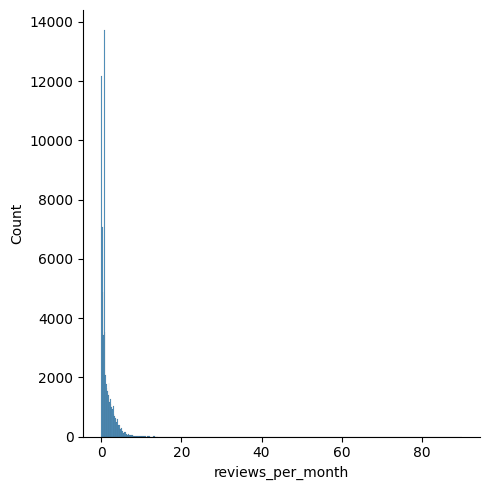

In [18]:
sns.displot(df['reviews_per_month']),df["reviews_per_month"].skew(),df['reviews_per_month'].max()

(<seaborn.axisgrid.FacetGrid at 0x2957e32e390>,
 np.float64(3.9241617468792733),
 np.float64(1024.0))

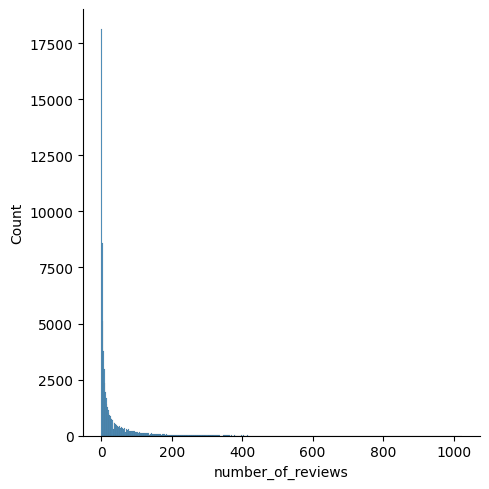

In [19]:
sns.displot(df['number_of_reviews']),df['number_of_reviews'].skew(),df["number_of_reviews"].max()

In [20]:
kurt = df.kurt()
print("\Kurt\n")
print(kurt)
## Observation : Skew and Kurt values are in range -3 to 3 then no need to have a transformation.

\Kurt

id                                 -1.139152
host_id                            -1.203777
lat                                 0.154057
long                                4.127319
construction_year                  -1.202227
price                              -1.188310
service_fee                        -1.187747
minimum_nights                     -0.254952
number_of_reviews                  25.873871
reviews_per_month                 311.589104
review_rate_number                 -1.111552
calculated_host_listings_count     47.551994
availability_365                   -1.328753
dtype: float64


<Figure size 1200x600 with 0 Axes>

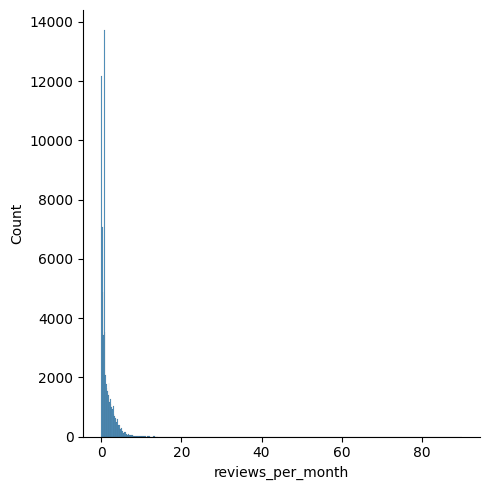

In [21]:
plt.figure(figsize=(12,6))
sns.displot(df['reviews_per_month'])
plt.show()

In [22]:
print('Before outlier removal : ',df.shape)
z = np.abs(zscore(df, axis = 1))
z1=(pd.DataFrame(z,columns=df.columns))
threshold = 3
dataset = df[(z < threshold).all(axis=1)]
print('After Z-Score approach : ',dataset.shape)

Before outlier removal :  (69305, 13)
After Z-Score approach :  (0, 13)


In [23]:
print('Before outlier removal : ',df.shape)
np.abs(zscore(df['host_id']))
threshold = 3.4641016
dataset = df['host_id'][(z < threshold).all(axis=1)]
print('After Z-Score approach : ',dataset.shape)

Before outlier removal :  (69305, 13)
After Z-Score approach :  (62640,)


In [24]:
dataset

10        1280143094
45        2107606817
51        1529890895
75        4726877402
80        6644226026
            ...     
69300    29964876857
69301    92852058426
69302    95572379802
69303    80154173698
69304    11145329848
Name: host_id, Length: 62640, dtype: int64

In [25]:
z_score=np.abs(df['host_id'])
threshold=3

In [26]:
dataset.info()

<class 'pandas.core.series.Series'>
Index: 62640 entries, 10 to 69304
Series name: host_id
Non-Null Count  Dtype
--------------  -----
62640 non-null  int64
dtypes: int64(1)
memory usage: 978.8 KB


In [27]:
for column in dataset.columns :
    plt.figure()
    sns.displot(dataset[column],color='darkorange',kind='kde')

AttributeError: 'Series' object has no attribute 'columns'

In [ ]:
for column in dataset.columns :
    plt.figure()
    sns.boxplot(x = dataset[column], data = dataset)

In [ ]:
skew1 = dataset.skew()
print("Skew1\t")
print(skew1)

print("\nSkew")
print(skew)
# print("\nKurt1\n")
# kurt1 = dataset.kurt()
# print(kurt1)

Skew1	
0.09575389296117945

Skew
id                                0.021827
host_id                           0.004266
lat                               0.214486
long                              1.246571
construction_year                 0.004561
price                             0.001848
service_fee                       0.002785
minimum_nights                    1.163166
number_of_reviews                 3.924162
reviews_per_month                 8.976864
review_rate_number               -0.137604
calculated_host_listings_count    6.538789
availability_365                  0.359776
dtype: float64


In [ ]:
df.shape

(69305, 13)

In [ ]:
# for i in df:
#     Q1 = np.percentile(df[i], 25, interpolation = 'midpoint') 
#     Q2 = np.percentile(df[i], 50, interpolation = 'midpoint') 
#     Q3 = np.percentile(df[i], 75, interpolation = 'midpoint') 

#     # Q1 = df.quantile(0.25)  # Q1
#     # Q3 = df.quantile(0.75)  # Q3
#     IQR = Q3-Q1
#     # dataset = df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
#     # dataset = dataset[~((dataset<(Q1-1.5*IQR)) | (dataset>(Q3+1.5*IQR)))]
#     # print('After IQR approach : ',dataset.shape)
#     low_lim = Q1 - 1.5 * IQR
#     up_lim = Q3 + 1.5 * IQR
#     print('low_limit is', low_lim)
#     print('up_limit is', up_lim)
#     outlier =[]
#     for x in df[i]:
#         if ((x> up_lim) or (x<low_lim)):
#             outlier.append(x)
#     print(' outlier in the dataset is', outlier)
#     df[i] = df.drop(df[i]==outlier)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69305 entries, 0 to 69304
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              69305 non-null  int64  
 1   host_id                         69305 non-null  int64  
 2   lat                             69305 non-null  float64
 3   long                            69305 non-null  float64
 4   construction_year               69305 non-null  float64
 5   price                           69305 non-null  float64
 6   service_fee                     69305 non-null  float64
 7   minimum_nights                  69305 non-null  float64
 8   number_of_reviews               69305 non-null  float64
 9   reviews_per_month               69305 non-null  float64
 10  review_rate_number              69305 non-null  float64
 11  calculated_host_listings_count  69305 non-null  float64
 12  availability_365                

In [ ]:
# if ((df[x].mean()> up_lim) or (df[x].mean()<low_lim)):
# # outlier =[]
# # # for data in
# # for x in df:
# #     # print(x)
# #     if ((df[x].mean()> up_lim) or (df[x].mean()<low_lim)):
# #          outlier.append(x)
# # print(' outlier in the dataset is', outlier)